# Named entity recognition (NER) in spaCy
Kate Riesbeck  
29 May 2020  
	
This notebook reviews named entity recognition (NER) in spaCy using:
* Pretrained spaCy models
* Customized NER with:
 * Rule-based matching with EntityRuler
	 * Phrase matcher
	 * Token matcher
 * Custom trained models
	 * New model
	 * Updating a pretrained model

## Setup

There is a requirements.txt file in this repository.

To setup:
1. clone the repository
2. cd to the directory where requirements.txt is located
3. activate your virtualenv
4. run: pip install -r requirements.txt

In [1]:
import spacy
from spacy import displacy
from IPython.display import Image
from IPython.core.display import display, HTML

C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_6120\1247186552.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## NER with spaCy's pretrained models

In [2]:
# Load a pretrained spaCy model
nlp = spacy.load('en_core_web_sm')

The pretrained model comes with a default processing pipeline that includes part-of-speech tagging, syntactic parsing, and NER.  The pretrained models are statistical and every “decision” they make is a prediction based on the examples the model has seen during training.  

spaCy makes it very easy to create your own pipelines consisting of reusable components – this includes spaCy’s default tagger, parser and entity recognizer, but also your own custom processing functions. 

In [23]:
# View pipeline components
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [4]:
pip install pdfminer.six

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 5.6/5.6 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from pdfminer.high_level import extract_text
 
text = extract_text("Oumaima MEJRI Resume.pdf")
 
print(text)

OUMAIMA
MEJRI

Data Science Engineer

+216 55 005 630

20 Imam Abou Hanifa Street,
Ariana Soghra, Ariana, Tunisia

oumaima.mejri@sesame.com.tn

I am a data science student preparing my
engineering degree in parallel with my masters
degree. During these years, in addition to
internships I realized lots of projects such as
CHAT-BOT and AUTOMATIC SUMMARIZATION
with NLP and CHURN CLIENT PREDICTION with ML.

EDUCATION

WORK EXPERIENCE

June 2017 - High school Ahmed
Aamara, Kef.

Baccalaureate certificate in Technical
Sciences.

June 2020 - High Institute of
technological studies, Nabeul.

 Informational system development
Bachelor Degree

October 2020 - High Institute of
technological studies, Nabeul.

 Digital Entrepreneurship and Data 
 Science Master's degree 

(M2 in prgress)

September 2021 -  SESAME University,
Ariana.

July 2020 - Summer internship

INHANCE,Ariana.
CRM development(React JS - Firebase - Cloud Functions )

March 2020 - End of studies internship

Cube IT, Nabeul.
Develo

In [31]:
# Run the text through the pretrained model
doc = nlp(text)

In [32]:
# The NER pipeline component tags entities in the doc with various attributes
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

OUMAIMA 0 7 ORG
MEJRI

Data Science Engineer 8 36 ORG
Imam Abou Hanifa Street 58 81 PERSON
Ariana Soghra 83 96 ORG
Ariana 98 104 GPE
Tunisia 106 113 GPE
these years 247 258 DATE
CHAT 323 327 ORG
NLP 365 368 ORG
CHURN CLIENT 373 385 ORG
June 2017 435 444 DATE
Aamara 465 471 GPE
Kef 473 476 GPE
Technical
Sciences 508 526 ORG
June 2020 - High Institute 529 555 DATE
Nabeul 582 588 GPE
Bachelor Degree 625 640 ORG
Nabeul 698 704 GPE
Digital Entrepreneurship 708 732 ORG
M2 771 773 CARDINAL
September 2021 -  SESAME University 787 822 DATE
Ariana 824 830 GPE
July 2020 - Summer 833 851 DATE
INHANCE 864 871 ORG
Ariana 872 878 GPE
CRM 880 883 ORG
March 2020 - End 937 953 DATE
Nabeul 986 992 GPE
Android 1056 1063 ORG
Java, Firestore 1065 1080 ORG
Ml Kit 1082 1088 PERSON
February 2020 - Internship

Maison Du Web 1101 1142 DATE
Nabeul
Developing 1144 1161 ORG
Laravel 1185 1192 ORG
February 2019 1204 1217 DATE
Maison Du Web 1243 1256 PERSON
Nabeul 1258 1264 GPE
html 1300 1304 PERSON
PHP 1328 1331 ORG


In [36]:
spacy.explain('GPE')

'Countries, cities, states'

In [34]:
# Use displacy to visualize entities
displacy.render(doc, style='ent', jupyter=True)

## How does the pretrained NER model work?

spaCy uses residual convolutional neural networks (CNNs) and incremental parsing with Bloom embeddings for NER. 

Watch this YouTube video from spaCy's developers for more detail (start at 8:20): https://www.youtube.com/watch?v=sqDHBH9IjRU 

SpaCy's pretrained models are trained on the OntoNotes5 corpus, and label these entities:

| TYPE | DESCRIPTION |
| --- | ------- |
| PERSON |People, including fictional. |
| NORP | Nationalities or religious or political groups. |
| FAC | Buildings, airports, highways, bridges, etc. |
| ORG | Companies, agencies, institutions, etc. |
| GPE | Countries, cities, states. |
| LOC | Non-GPE locations, mountain ranges, bodies of water. |
| PRODUCT | Objects, vehicles, foods, etc. (Not services.) |
| EVENT | Named hurricanes, battles, wars, sports events, etc. |
| WORK_OF_ART | Titles of books, songs, etc. |
| LAW | Named documents made into laws. |
| LANGUAGE | Any named language. |
| DATE | Absolute or relative dates or periods. |
| TIME | Times smaller than a day. |
| PERCENT | Percentage, including ”%“. |
| MONEY | Monetary values, including unit. |
| QUANTITY | Measurements, as of weight or distance. |
| ORDINAL | “first”, “second”, etc. |
| CARDINAL | Numerals that do not fall under another type. |


## How can I customize NER in spaCy for my use case?

1. Add rule-based matching
 * Useful if there’s a finite number of examples that you want to find in the data, or if there’s a very clear, structured pattern
 * For instance, country names, IP addresses or URLs
2. Train a custom model
 * Useful if you have examples and you want your system to generalize based on those examples
 * Works especially well if there are clues in the local context
 * For instance, person or company names

You can also combine both approaches and improve a model with rules to handle very specific cases and boost accuracy.

## Rule-based matching with EntityRuler

 * Useful if there’s a finite number of examples that you want to find in the data, or if there’s a very clear, structured pattern
 * For instance, country names, IP addresses or URLs

SpaCy's EntityRuler is a pipeline component that lets you add named entities based on pattern dictionaries, and makes it easy to combine rule-based and statistical NER for more powerful models.


The entity ruler integrates with spaCy’s existing statistical models and enhances the named entity recognizer. 



In [10]:
from spacy.pipeline import EntityRuler

In [11]:
ruler = EntityRuler(nlp)

### Patterns

https://spacy.io/api/entityruler#add_patterns

Entity patterns in spaCy are dictionaries with two keys: 
1. "label", the label to assign to the entity
2. "pattern", the match pattern. 

The entity ruler accepts two types of patterns:
1. Phrase patterns for exact string matches
2. Token patterns with one pattern dictionary per token

### Phrase patterns

Phrase patterns for exact string matches.  

Here is a phrase pattern example:  
patterns = [{"label": "PRES", "pattern": "George Washington"}]

In [12]:
ruler.add_patterns([{"label": "PRES", "pattern": "George Washington"}])

In [13]:
# Add EntityRuler pipeline component to the nlp model pipeline before the existing 'ner' pipeline
nlp.add_pipe(ruler, before='ner', name='presidents')

ValueError: [E966] `nlp.add_pipe` now takes the string name of the registered component factory, not a callable component. Expected string, but got <spacy.pipeline.entityruler.EntityRuler object at 0x000001E7F1CF3A00> (name: 'presidents').

- If you created your component with `nlp.create_pipe('name')`: remove nlp.create_pipe and call `nlp.add_pipe('name')` instead.

- If you passed in a component like `TextCategorizer()`: call `nlp.add_pipe` with the string name instead, e.g. `nlp.add_pipe('textcat')`.

- If you're using a custom component: Add the decorator `@Language.component` (for function components) or `@Language.factory` (for class components / factories) to your custom component and assign it a name, e.g. `@Language.component('your_name')`. You can then run `nlp.add_pipe('your_name')` to add it to the pipeline.

Important: If the EntityRuler is added before the "ner" component,'ner' will respect the EntityRuler labels 
and adjust its predictions.  This is what we want.

If it’s added after the "ner" component, the EntityRuler will only tag entities if they don’t overlap 
with entities predicted by 'ner'. To overwrite overlapping entities, you can set overwrite_ents=True on initialization.

In [14]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [15]:
# Run the text through the new model pipeline
doc = nlp(text)

In [ ]:
# for ent in doc.ents:
#     print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [16]:
displacy.render(doc, style='ent')

**Let's add more patterns for more presidents.**

In [17]:
# Starting with a list of president names
presidents = ["Donald Trump" , "Barack Obama" , "George W. Bush" , "Bill Clinton" , "George H.W. Bush" , "Ronald Reagan" , "Jimmy Carter" , "Gerald Ford" , "Richard Nixon" , "Lyndon B. Johnson" , "John F. Kennedy" , "Dwight D. Eisenhower", "Harry S. Truman" , "Franklin D. Roosevelt" , "Herbert Hoover" , "Calvin Coolidge" , "Warren G. Harding" , "Woodrow Wilson" , "Howard Taft" , "Theodore Roosevelt" , "William McKinley" , "Grover Cleveland" , "Benjamin Harrison" , "Grover Cleveland" , "Chester A. Arthur" , "James Garfield" , "Rutherford B. Hayes" , "Ulysses S. Grant" , "Andrew Johnson" , "Abraham Lincoln" , "James Buchanan" , "Franklin Pierce" , "Millard Fillmore", "Zachary Taylor" , "James K. Polk" , "John Tyler" , "William Henry Harrison" , "Martin Van Buren" , "Andrew Jackson" , "John Quincy Adams" , "James Monroe" , "James Madison" , "Thomas Jefferson" , "John Adams"]

In [18]:
# Write a function to turn the list into spaCy's entity pattern list of dictionaries format
def make_patterns(my_list, my_label):
    """
    turns a list of strings into a list of patterns with the same label for spaCy's EntityRuler
    """
    patterns = []
    for i in my_list:
        d = {}
        d['label'] = my_label
        d['pattern'] = i
        patterns.append(d)
    return patterns    

In [19]:
# Create the patterns
patterns = make_patterns(presidents, "PRES")

In [20]:
# Verify pattern format -- a list of dictionaries
patterns[:10]

[{'label': 'PRES', 'pattern': 'Donald Trump'},
 {'label': 'PRES', 'pattern': 'Barack Obama'},
 {'label': 'PRES', 'pattern': 'George W. Bush'},
 {'label': 'PRES', 'pattern': 'Bill Clinton'},
 {'label': 'PRES', 'pattern': 'George H.W. Bush'},
 {'label': 'PRES', 'pattern': 'Ronald Reagan'},
 {'label': 'PRES', 'pattern': 'Jimmy Carter'},
 {'label': 'PRES', 'pattern': 'Gerald Ford'},
 {'label': 'PRES', 'pattern': 'Richard Nixon'},
 {'label': 'PRES', 'pattern': 'Lyndon B. Johnson'}]

In [21]:
# Add the patterns to the EntityRuler pipeline component
ruler.add_patterns(patterns)

In [ ]:
# Check to make sure our new patterns were added to the EntityRuler
# ruler.patterns[:10]

In [22]:
# Remove existing 'presidents' pipe
nlp.remove_pipe('presidents');

ValueError: [E001] No component 'presidents' found in pipeline. Available names: ['tok2vec', 'tagger', 'parser', 'senter', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
# Add updated EntityRuler pipeline component to the nlp model pipeline
nlp.add_pipe(ruler, before='ner', name='presidents')

In [ ]:
doc = nlp("George H.W. Bush (June 12, 1924 – November 30, 2018) was an American politician and businessman \
          who served as the 41st president of the United States from 1989 to 1993.")

In [ ]:
# for ent in doc.ents:
#     print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [ ]:
displacy.render(doc, style='ent')

**Note phrase matches are limited to exact string matches.**

In [ ]:
# This name format does not match a pattern
doc = nlp("George Herbert Walker Bush (June 12, 1924 – November 30, 2018) was an American politician and businessman \
          who served as the 41st president of the United States from 1989 to 1993.")

In [ ]:
# for ent in doc.ents:
#     print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [ ]:
displacy.render(doc, style='ent')

In [ ]:
# Remove existing 'presidents' pipe and reset EntityRuler

nlp.remove_pipe('presidents')

ruler = EntityRuler(nlp)

patterns = []

### Token patterns
 
Token patterns can be more complex, making rules based on token attributes and using regular expressions.  Token patterns have one pattern dictionary per token.  

Here is a token pattern example:  
patterns = [{"label": "VP", "pattern": [{"LOWER": "al"}, {"LOWER": "gore"}]}]


In [ ]:
# 2 tokens (like george bush)
patterns.append({"id":"PRES41", "label": "PRES", "pattern": [{"LOWER": 'george'}, {"LOWER": 'bush'}]})

# 3 tokens (like george hw bush, george h.w. bush)
patterns.append({"id":"PRES41", "label": "PRES", "pattern": [{"LOWER": 'george'}, {"LOWER": {"REGEX": '(h(w|.w.)?)'}}, {"LOWER":  'bush'}]})

# 4 tokens (like george h w bush, george h. w. bush, george herbert walker bush)
patterns.append({"id":"PRES41", "label": "PRES", "pattern": [{"LOWER": 'george'}, {"LOWER": {"REGEX": '(h(.|erbert)?)'}}, {"LOWER": {"REGEX": '(w(.|alker)?)'}}, {"LOWER":  'bush'}]})

In [ ]:
ruler.add_patterns(patterns)

In [ ]:
nlp.add_pipe(ruler, before='ner', name='presidents')

In [ ]:
doc = nlp("George Herbert Walker Bush was an American politician and businessman \
          who served as the 41st president of the United States from 1989 to 1993. \
          His son, George W. Bush, served as the 43rd president of the United States. \
          Known names: George H.W. Bush, George H. W. Bush, George HW Bush, George H W Bush, George Bush")

In [ ]:
# for ent in doc.ents:
#     print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [ ]:
displacy.render(doc, style='ent')

## Train a custom model
 * Useful if you have domain-specific examples and you want your system to generalize based on those examples
 * Works especially well if there are clues in the local context
 * For instance, person or company names
 
Note:  Requires a labeled dataset (at least a few hundred, more is better)

In [ ]:
from spacy.util import minibatch, compounding
import random

### Get training data

For this example, we'll use the **MIT Movies** corpus, which contains 10,000 queries about various aspects of movies, with the following entity labels: ACTOR, TITLE, GENRE, DIRECTOR, etc.


The train and test datasets are available here: https://groups.csail.mit.edu/sls/downloads/movie/

They're saved in the data/ directory of this repository, but here are the curl commands for reference:
* curl https://groups.csail.mit.edu/sls/downloads/movie/engtest.bio -o data/test.txt
* curl https://groups.csail.mit.edu/sls/downloads/movie/engtrain.bio -o data/train.txt

In [ ]:
# Look at the train data:
f = open('data/train.txt', 'r')
train = f.read()
f.close()

print(train[:1000])

O	what
O	movies
O	star
B-ACTOR	bruce
I-ACTOR	willis

O	show
O	me
O	films
O	with
B-ACTOR	drew
I-ACTOR	barrymore
O	from
O	the
B-YEAR	1980s

O	what
O	movies
O	starred
O	both
B-ACTOR	al
I-ACTOR	pacino
O	and
B-ACTOR	robert
I-ACTOR	deniro

O	find
O	me
O	all
O	of
O	the
O	movies
O	that
O	starred
B-ACTOR	harold
I-ACTOR	ramis
O	and
B-ACTOR	bill
I-ACTOR	murray

O	find
O	me
O	a
O	movie
O	with
O	a
O	quote
O	about
O	baseball
O	in
O	it

O	what
O	movies
O	have
B-TITLE	mississippi
O	in
O	the
O	title

O	show
O	me
B-GENRE	science
I-GENRE	fiction
I-GENRE	films
O	directed
O	by
B-DIRECTOR	steven
I-DIRECTOR	spielberg

O	do
O	you
O	have
O	any
B-GENRE	thrillers
O	directed
O	by
B-DIRECTOR	sofia
I-DIRECTOR	coppola

O	what
B-SONG	leonard
I-SONG	cohen
I-SONG	songs
O	have
O	been
O	used
O	in
O	a
O	movie

O	show
O	me
O	films
B-ACTOR	elvis
O	films
B-PLOT	set
I-PLOT	in
I-PLOT	hawaii

O	what
O	movie
O	is
O	references
B-PLOT	zydrate

O	are
O	there
O	any
B-GENRE	musical
I-GENRE	films
O	with
B-ACTOR	patrick
I-ACTOR	dempsey

### Reformat training data

The datasat is tab and newline separated.

spaCy takes training data in JSON format, like this: 

TRAIN_DATA = [[Sentence, {entities: [(start, end, label)]}, ...]...]

spaCy's convert command can automatically reformat many common file structures to JSON (https://spacy.io/api/cli#convert).  Unfortunately our file structure isn't one of them, so we'll do it ourselves.

In [ ]:
def load_data_spacy(file_path):
    ''' 
    Converts data from:
    label \t word \n label \t word \n \n label \t word
    to: sentence, {entities : [(start, end, label), (stard, end, label)]}
    '''
    file = open(file_path, 'r')
    training_data, entities, sentence, unique_labels = [], [], [], []
    current_annotation = None
    end = 0 # initialize counter to keep track of start and end characters
    for line in file:
        line = line.strip("\n").split("\t")
        # lines with len > 1 are words
        if len(line) > 1:
            label = line[0][2:] # the .txt is formatted: label \t word, label[0:2] = label_type
            label_type = line[0][0] # beginning of annotations - "B", intermediate - "I"
            word = line[1]
            sentence.append(word)
            end += (len(word) + 1) # length of the word + trailing space

            if label_type != 'I' and current_annotation: # if at the end of an annotation
                entities.append((start, end - 2 - len(word), current_annotation)) # append the annotation
                current_annotation = None # reset the annotation
            if label_type == 'B': # if beginning new annotation
                start = end - len(word) - 1 # start annotation at beginning of word
                current_annotation = label # append the word to the current annotation
            if label_type == 'I': # if the annotation is multi-word
                current_annotation = label # append the word

            if label != 'O' and label not in unique_labels:
                unique_labels.append(label)

        # lines with len == 1 are breaks between sentences
        if len(line) == 1:
            if current_annotation:
                entities.append((start, end - 1, current_annotation))
            sentence = " ".join(sentence)
            training_data.append([sentence, {'entities' : entities}])
            # reset the counters and temporary lists
            end = 0
            entities, sentence = [], []
            current_annotation = None
    file.close()
    return training_data, unique_labels

In [ ]:
TRAIN_DATA, LABELS = load_data_spacy("data/train.txt")

In [ ]:
TRAIN_DATA[:10]

[['what movies star bruce willis', {'entities': [(17, 29, 'ACTOR')]}],
 ['show me films with drew barrymore from the 1980s',
  {'entities': [(19, 33, 'ACTOR'), (43, 48, 'YEAR')]}],
 ['what movies starred both al pacino and robert deniro',
  {'entities': [(25, 34, 'ACTOR'), (39, 52, 'ACTOR')]}],
 ['find me all of the movies that starred harold ramis and bill murray',
  {'entities': [(39, 51, 'ACTOR'), (56, 67, 'ACTOR')]}],
 ['find me a movie with a quote about baseball in it', {'entities': []}],
 ['what movies have mississippi in the title',
  {'entities': [(17, 28, 'TITLE')]}],
 ['show me science fiction films directed by steven spielberg',
  {'entities': [(8, 29, 'GENRE'), (42, 58, 'DIRECTOR')]}],
 ['do you have any thrillers directed by sofia coppola',
  {'entities': [(16, 25, 'GENRE'), (38, 51, 'DIRECTOR')]}],
 ['what leonard cohen songs have been used in a movie',
  {'entities': [(5, 24, 'SONG')]}],
 ['show me films elvis films set in hawaii',
  {'entities': [(14, 19, 'ACTOR'), (26

In [ ]:
# LABELS

### Training an NER model

1. Train a new NER model
 * Useful if you have a domain and context specific dataset
2. Update an pretrained NER model
 * Useful if you want to extend or update the results of a pretrained model
 * Important: If you are updating an existing NER model, run your training data through the existing NER pipeline before training.  This prevents "catastrophic forgetting," a phenomenon where the model "forgets" what it previously knew.  
See: https://explosion.ai/blog/pseudo-rehearsal-catastrophic-forgetting


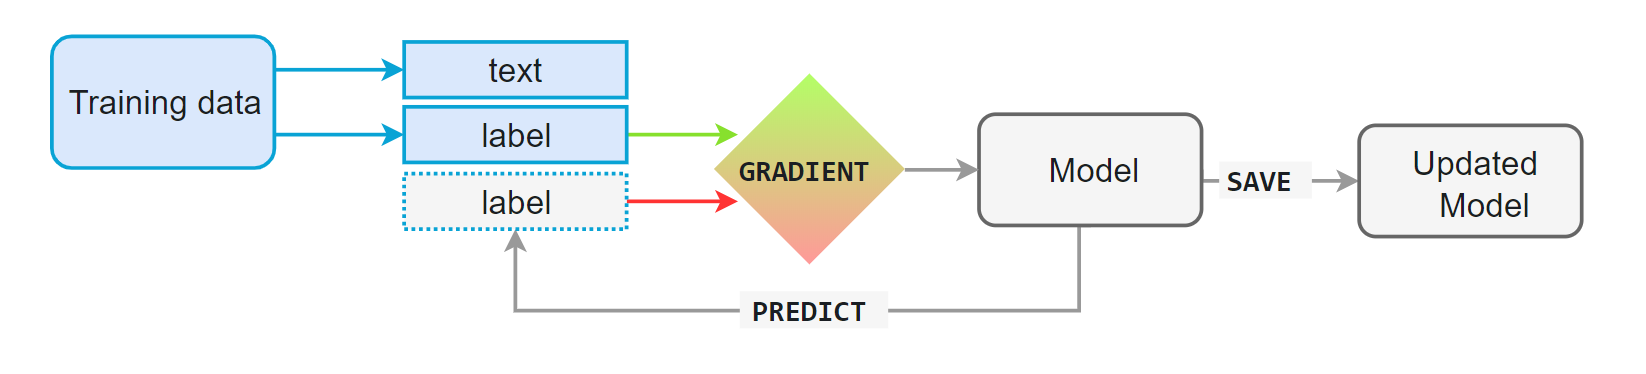

In [ ]:
Image(filename = 'images/training.png', width=1000, height=1000)

**Training data**: Examples and their annotations.  
**Text**: The input text the model should predict a label for.  
**Label**: The label the model should predict.  
**Gradient**: Gradient of the loss function calculating the difference between input and expected output.  

Because we know the correct answer, we can give the model feedback on its prediction in the form of an error gradient of the loss function that calculates the difference between the training example and the expected output. The greater the difference, the more significant the gradient and the updates to our model.

When training a model, we don’t just want it to memorise our examples — we want it to come up with theory that can be generalised across other examples. 

Techniques to improve the learning results:
* **Iterations**: we'll run the model on our training data multiple times.  at each iteration, the model will evaluate its predictions against the true labels and adjust its weights accordingly
* **Shuffle**: at each iteration, the training data is shuffled so the model doesn’t make any generalisations based on order
* **Minibatch with compounding**: at each iteration, a different batch size of our training data is used. see: https://spacy.io/usage/training#tips-batch-size
* **Dropout rate**: at each iteration, randomly “drop” a percentage of features to avoid memorization.  for smaller training datasets, use decaying, see: https://spacy.io/usage/training#tips-dropout

In [ ]:
# Set values
model = None # 'en_core_web_sm' to update a pretrained model or None to train a new model
n_iter = 10
random.seed(0)

In [ ]:
%%time

# Load pretrained spaCy model or create a blank model
if model is not None:
    nlp = spacy.load(model)
else:
    nlp = spacy.blank("en")

# Get ner pipeline component (create if necessary)
if "ner" not in nlp.pipe_names:
    ner = nlp.create_pipe("ner")
    nlp.add_pipe(ner)
else:
    ner = nlp.get_pipe("ner")

# Add new entity labels to entity recognizer
for i in LABELS:
    ner.add_label(i)

# Set optimizer
if model is None:
    optimizer = nlp.begin_training()
else:
    optimizer = nlp.resume_training()

move_names = list(ner.move_names)

# Get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]

# Only train NER pipe
with nlp.disable_pipes(*other_pipes):
    # Process our training examples in iterations using shuffle, batches, and dropouts
    sizes = compounding(1, 16, 1.001)
    for itn in range(n_iter):
        random.shuffle(TRAIN_DATA)
        batches = minibatch(TRAIN_DATA, size=sizes)
        losses = {}
        for batch in batches:
            texts, annotations = zip(*batch)
            # For each example, nlp.update steps through the words of the input 
            # At each word, it makes a prediction on the text and checks the annotations 
            # If it was wrong, it adjusts its weights
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2, losses=losses)
        print("Losses", losses)

Losses {'ner': 18342.52127067367}
Losses {'ner': 11574.817071992438}
Losses {'ner': 9771.938528463244}
Losses {'ner': 8829.217285802239}
Losses {'ner': 8044.601565065328}
Losses {'ner': 7471.223289163434}
Losses {'ner': 7191.393982288078}
Losses {'ner': 6667.037303411635}
Losses {'ner': 6277.685998656234}
Losses {'ner': 6075.776474699742}
CPU times: user 2min 54s, sys: 93.8 ms, total: 2min 54s
Wall time: 2min 54s


In [ ]:
# Save model to output directory
nlp.meta["name"] = "movies_new"
nlp.to_disk('models/movies_new')

### Evaluate model performance

Test the model to make sure the entities in the training data are recognized correctly.

In [ ]:
# Load the unseen test data
TEST_DATA, _ = load_data_spacy("data/test.txt")

In [ ]:
# Get the first 5 sentences
test_sentences = [x[0] for x in TEST_DATA[:50]]

In [ ]:
# Load new model
movies_ner = spacy.load('models/movies_new')

In [ ]:
movies_ner.pipe_names

['ner']

In [ ]:
# Test the trained model
for x in test_sentences:
    doc = movies_ner(x)
#     for ent in doc.ents:
#         print(ent.text, ent.start_char, ent.end_char, ent.label_)
    displacy.render(doc, style = "ent")

**Evaluation metrics using Scorer**

For each entity in the test data, we can calculate the precision, recall, f-score, and more:
* Precision: true positives / (true positives + false positives)  
* Recall: true positives / (true positives + false negatives)  
* F1-score: a measure of accuracy; the harmonic average of precision and recall

In [ ]:
from spacy.scorer import Scorer
from spacy.gold import GoldParse

def evaluate(ner_model, examples):
    scorer = Scorer()
    for input_, annot in examples:
        doc_gold_text = ner_model.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=annot['entities'])
        pred_value = ner_model(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

In [ ]:
scores = evaluate(movies_ner, TEST_DATA)

In [ ]:
print("Precision: {} \nRecall: {} \nF1-score: {}".format(scores['ents_p'],
                                                         scores['ents_r'],
                                                         scores['ents_f']))

Precision: 84.48243820851144 
Recall: 85.14703127926579 
F1-score: 84.8134328358209


In [ ]:
# Access the precision, recall, and f1 scores by entity type
print(scores['ents_per_type'])

{'GENRE': {'p': 89.19382504288164, 'r': 93.10653536257834, 'f': 91.10819097678494}, 'YEAR': {'p': 93.85245901639344, 'r': 95.41666666666667, 'f': 94.62809917355372}, 'PLOT': {'p': 60.03861003861004, 'r': 63.34012219959266, 'f': 61.64519326065411}, 'ACTOR': {'p': 87.73584905660378, 'r': 91.62561576354679, 'f': 89.63855421686748}, 'RATINGS_AVERAGE': {'p': 82.93736501079914, 'r': 85.14412416851441, 'f': 84.02625820568927}, 'TITLE': {'p': 80.34026465028356, 'r': 75.62277580071174, 'f': 77.91017415215399}, 'SONG': {'p': 55.10204081632652, 'r': 50.0, 'f': 52.42718446601942}, 'CHARACTER': {'p': 47.91666666666667, 'r': 51.11111111111111, 'f': 49.46236559139785}, 'RATING': {'p': 91.83266932270917, 'r': 92.2, 'f': 92.01596806387225}, 'DIRECTOR': {'p': 91.50943396226415, 'r': 85.08771929824562, 'f': 88.18181818181819}, 'REVIEW': {'p': 30.434782608695656, 'r': 12.5, 'f': 17.72151898734177}, 'TRAILER': {'p': 83.87096774193549, 'r': 86.66666666666667, 'f': 85.24590163934425}}


## Conclusion

This notebook reviews named entity recognition (NER) in spaCy using:
* Pretrained spaCy models
* Customized NER with:
 * Rule-based matching with EntityRuler
   * Phrase matcher
   * Token matcher
 * Custom trained models
   * New model
   * Updating a pretrained model

## Possible next steps

* Mock-up dynamic learning model based on user feedback via a tool like Prodigy
* Investigate transfer learning with spacy pretrain

## Resources

https://www.youtube.com/watch?v=sqDHBH9IjRU  
https://spacy.io/api/entityruler#add_patterns  
https://spacy.io/api/annotation#named-entities  
https://explosion.ai/blog/pseudo-rehearsal-catastrophic-forgetting  
https://spacy.io/usage/training  
https://github.com/explosion/spaCy/blob/master/examples/training/train_ner.py  
https://spacy.io/usage/training#tips-batch-size  
https://aihub.cloud.google.com/p/products%2F2290fc65-0041-4c87-a898-0289f59aa8ba  